In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import clear_output

pd.set_option('display.max_rows', None)
sns.set(rc={'figure.figsize':(18,8)})

# User data

In [7]:
users_df = pd.read_json('data/bgg_UserItem.jl', lines = True)

In [3]:
#Number of users
len(users_df)

374577

In [4]:
# Data available
users_df.columns

Index(['bgg_user_name', 'country', 'first_name', 'item_id', 'last_login',
       'last_name', 'region', 'registered', 'updated_at', 'external_link',
       'image_file', 'image_url'],
      dtype='object')

In [5]:
# Sample of data
users_df[['bgg_user_name', 'country', 'region']].head(20)

,bgg_user_name,country,region
0,beastvol,United States,California
1,fu_koios,United States,Ohio
2,mycroft,United States,New Mexico
3,woh,Belgium,NaN
4,(mostly) harmless,Austria,NaN
5,- v -,NaN,NaN
6,-=yod@=-,Spain,NaN
7,-de-,Poland,NaN
8,-grizzly-,Czech Republic,Unspecified
9,-johnny-,Canada,Quebec


<AxesSubplot:>

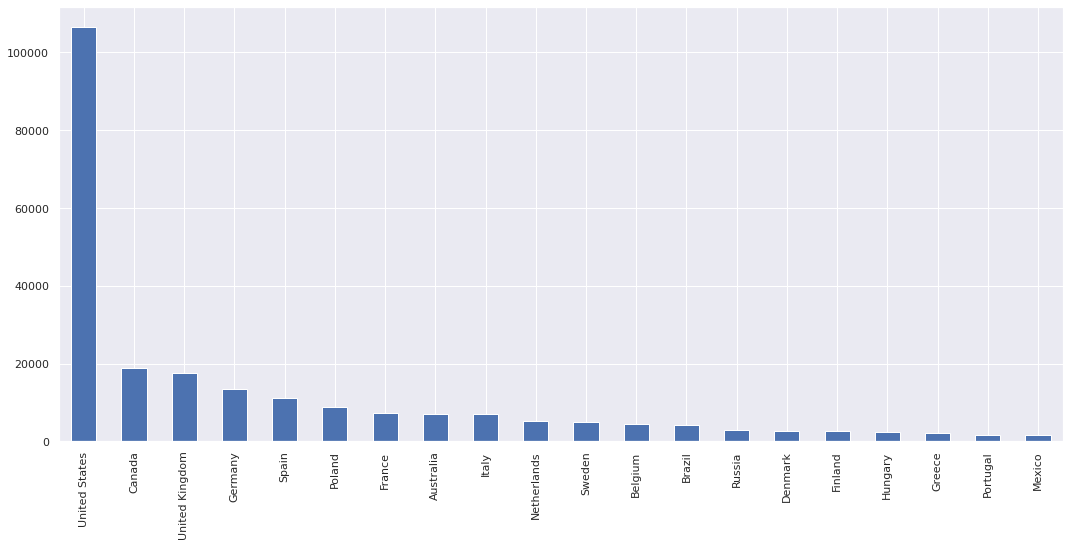

In [6]:
# User distribution by country
users_df['country'].value_counts()[:20].plot(kind='bar')

# Rating data

40,200,532 entries

In [2]:
# Can't read entire file
ratings_df = pd.read_json('./data/bgg_RatingItem.jl', lines = True, nrows=20)

In [3]:
# Data available
ratings_df.columns

Index(['bgg_id', 'bgg_user_for_trade', 'bgg_user_name', 'bgg_user_owned',
       'bgg_user_play_count', 'bgg_user_preordered', 'bgg_user_prev_owned',
       'bgg_user_rating', 'bgg_user_want_in_trade', 'bgg_user_want_to_buy',
       'bgg_user_want_to_play', 'item_id', 'updated_at', 'comment'],
      dtype='object')

In [11]:
# Sample of data
ratings_df[['bgg_user_name', 'bgg_id', 'bgg_user_rating', 'bgg_user_owned', 'bgg_user_want_to_play']].head(20)

,bgg_user_name,bgg_id,bgg_user_rating,bgg_user_owned,bgg_user_want_to_play
0,beastvol,13,8.0,True,False
1,beastvol,118,7.0,True,False
2,beastvol,278,7.0,True,False
3,beastvol,823,6.0,True,False
4,beastvol,3076,9.0,True,False
5,beastvol,5737,8.0,True,False
6,beastvol,9209,7.0,True,False
7,beastvol,12004,5.0,True,False
8,beastvol,18602,9.0,True,False
9,fu_koios,38453,NaN,False,False


In [12]:
# Read partial data in batches
batch_size = 1000000
n_iter = 0
ratings_df = pd.DataFrame()
with open('./data/bgg_RatingItem.jl') as f:
    batch = pd.read_json(f, lines=True, nrows=batch_size)
    while(not batch.empty):
        clear_output()
        print(n_iter)
        ratings_df = ratings_df.append(batch[['bgg_id', 'bgg_user_name', 'bgg_user_rating',
                                              'bgg_user_owned', 'bgg_user_play_count', 'bgg_user_want_to_play',
                                              'bgg_user_want_to_buy']])
        batch = pd.read_json(f, lines=True, nrows=batch_size)
        n_iter += 1

40


In [25]:
# Total number of entries
len(ratings_df)

40200532

## Attributes usability

### bgg_user_rating

In [14]:
print(f"Lowest rating present in the set: {ratings_df['bgg_user_rating'].min()}")
print(f"Highest rating present in the set: {ratings_df['bgg_user_rating'].max()}")

Lowest rating present in the set: 1.4013e-45
Highest rating present in the set: 10.0


In [20]:
# Round the ratings
ratings_fixed = pd.Series(index=np.arange(11), dtype='int64')
user_ratings = ratings_df['bgg_user_rating'].value_counts()

for idx, val in zip(user_ratings.index, user_ratings.values):
    ratings_fixed[np.rint(idx)] += val

In [21]:
# Frequency of each rating
ratings_fixed

0          18
1       91470
2      155546
3      301708
4      633370
5     1228404
6     3327211
7     4205422
8     4744013
9     1696283
10     971498
dtype: int64

In [24]:
# Total number of ratings
ratings_fixed.sum()

17354943

<AxesSubplot:>

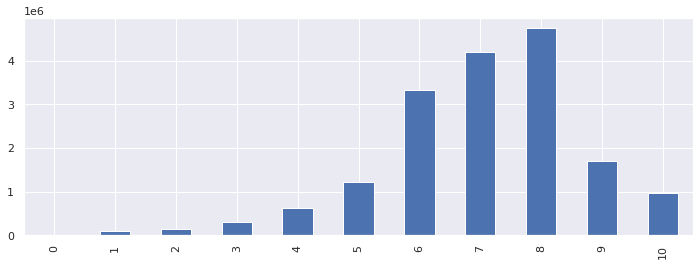

In [27]:
# Frequency of ratings illustrated
plt.figure(figsize=(12,4))
ratings_fixed.plot(kind='bar')

### bgg_user_owned

In [28]:
# Number of items marked as owned
ratings_df['bgg_user_owned'].value_counts()

1.0    21879410
0.0    15761767
Name: bgg_user_owned, dtype: int64

### bgg_user_want_to_play

In [30]:
# Number of items marked "want to play"
ratings_df['bgg_user_want_to_play'].value_counts()

0.0    35449621
1.0     2191556
Name: bgg_user_want_to_play, dtype: int64

### bgg_user_want_to_buy

In [31]:
# Number of items marked "want to buy"
ratings_df['bgg_user_want_to_buy'].value_counts()

0.0    36933544
1.0      707633
Name: bgg_user_want_to_buy, dtype: int64

### bgg_user_play_count

In [38]:
play_counts = ratings_df['bgg_user_play_count'].value_counts()[:100]

In [60]:
# Numbers of times users said they played the game
play_counts[:20]

0     28692757
1      5182367
2      1959521
3      1088363
4       682740
5       494225
6       351336
7       257323
8       204297
10      158116
9       154968
11      110105
12       97108
13       75907
14       65265
15       63569
16       50491
17       42768
20       37966
18       37916
Name: bgg_user_play_count, dtype: int64

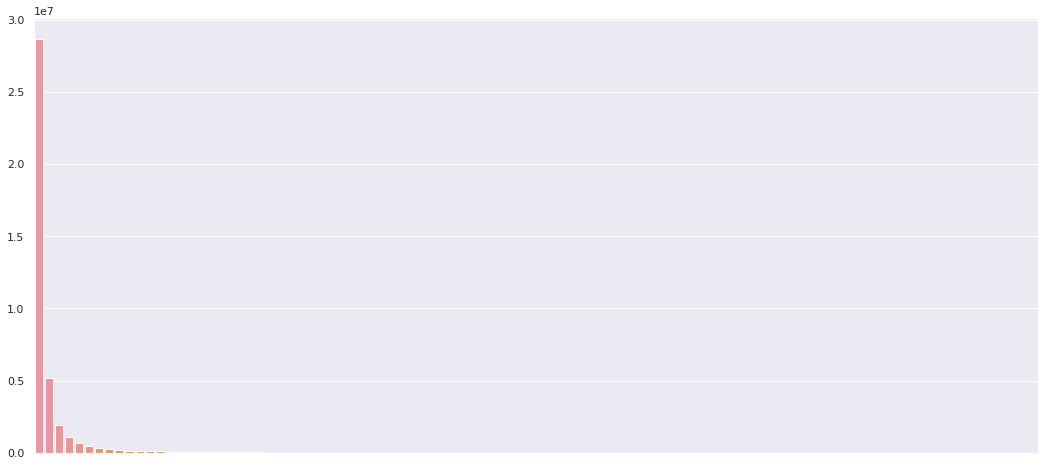

In [40]:
sns.barplot(x=play_counts.index, y=play_counts.values).set(xticks=[])
pass

## Rating statistics by games

In [47]:
game_stats = ratings_df[['bgg_id', 'bgg_user_owned', 'bgg_user_rating']].groupby('bgg_id').agg('count')

In [51]:
# Number of games marked as owned by over 10,000 people
(game_stats['bgg_user_owned'] > 10000).sum()

695

In [52]:
# Number of games rated by over 10,000 people
(game_stats['bgg_user_rating'] > 10000).sum()

318

## Rating statistics by users

In [54]:
user_stats = ratings_df[['bgg_user_name', 'bgg_user_owned', 'bgg_user_rating']].groupby('bgg_user_name').agg('count')

In [55]:
# Number of users who rated over 20 games
(user_stats['bgg_user_rating'] > 20).sum()

151073

In [58]:
# Number of users who own over 20 games
(user_stats['bgg_user_owned'] > 20).sum()

221971